In [9]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.

training_data = datasets.FashionMNIST(
  root = "data",
  train = True,
  download = True,
  transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
  root = 'data',
  train = False,
  download = True,
  transform = ToTensor()
)

In [10]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

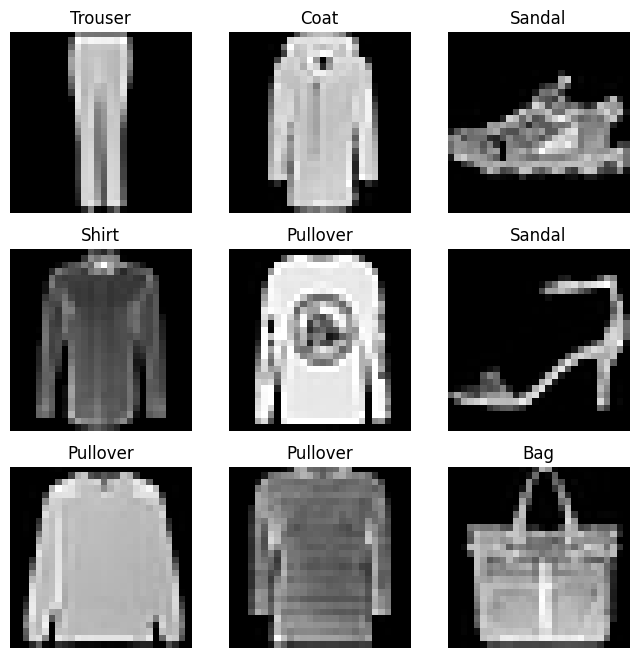

In [11]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (8, 8))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size = (1, )).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(classes[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

# Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


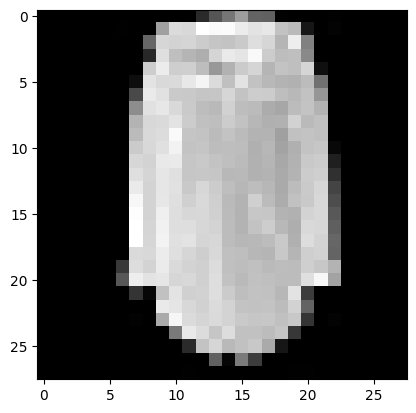

Label: 4


In [31]:
# Display image and label

train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.show()

print(f"Label: {label}")

In [46]:
# Transforms

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
  root = "data",
  train = True,
  download = True,
  transform = ToTensor(),
  target_transform = Lambda(lambda y: torch.zeros(
    10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))
)

In [47]:
image, label = ds[0]

print(label)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
